## Observations and Insights 

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [158]:
# Checking the number of mice.
total_mice = merged_df['Mouse ID'].count()
total_mice

1893

In [159]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df[merged_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [160]:
# Optional: Get all the data for the duplicate mouse ID. 
#???

In [161]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = clean_df['Mouse ID'].count()
new_total_mice

1892

## Summary Statistics

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regime_grouped = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tvol = regime_grouped['Tumor Volume (mm3)']

tvol_mean = tvol.mean()
tvol_mean

tvol_median = tvol.median()
tvol_median

tvol_var = tvol.var()
tvol_var

tvol_std = tvol.std()
tvol_std

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})
summary_stats_df
#add more details?

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.368318,50.909965,42.278090,6.502160
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean": tvol_mean, 
                                    "Median": tvol_median,
                                    "Variance": tvol_var,
                                     "Standard Deviation" : tvol_std})
# Using the aggregation method, produce the same summary statistics in a single line
#????


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

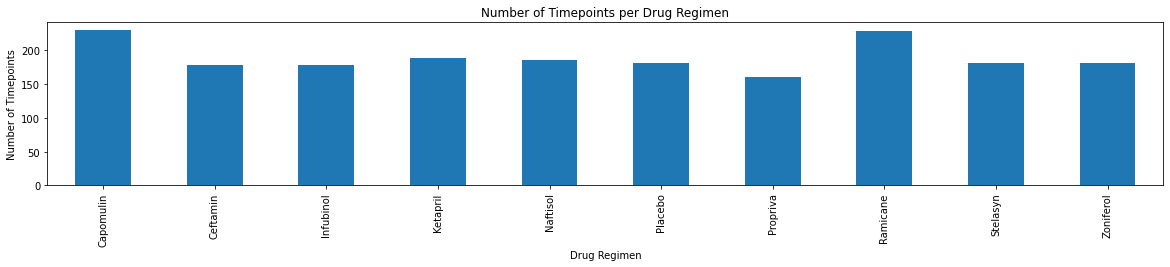

In [165]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#set variables
timepoint = regime_grouped['Timepoint']
drug_names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
total_timepoint = timepoint.count()
x_values1 = range(len(total_timepoint))
tick_locations = [value for value in x_values1]

#create bar graph
total_timepoint.plot(kind="bar", figsize=(20,3))
plt.title("Number of Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

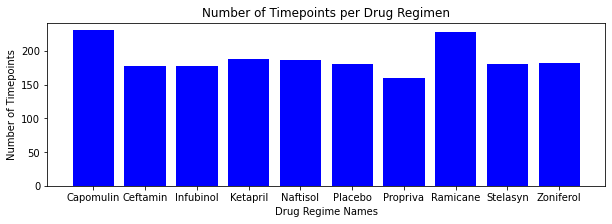

In [166]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,3))
plt.bar(x_values1, total_timepoint, color='blue', align="center")
plt.xticks(tick_locations, drug_names)
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regime Names")
plt.ylabel("Number of Timepoints")


Text(0, 0.5, ' ')

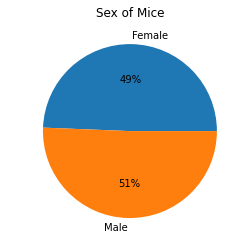

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#make new df based on sex
sex_grouped = clean_df.groupby('Sex')
mouse_ID = sex_grouped['Mouse ID']
sex = mouse_ID.count()
sex

sex.plot(kind="pie", autopct='%1.0f%%', title='Sex of Mice')
plt.ylabel(" ")


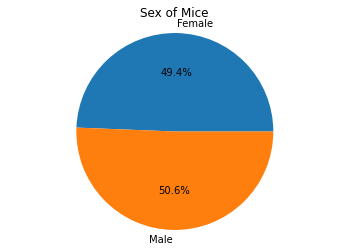

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Sex of Mice")
plt.pie(sex, labels=['Female', 'Male'],
        autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

new_index = clean_df.set_index('Drug Regimen')

boxplot_df = new_index.drop [labels=['Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Stelasyn', 'Zoniferol']]



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


SyntaxError: invalid syntax (30732298.py, line 6)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
